In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [278]:
data = pd.read_csv('data.csv')

In [279]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [281]:
relational = list()

In [282]:
# şimdi ilk önce salary_in_usd değişkenini inceleyelim
data['salary_in_usd'].describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


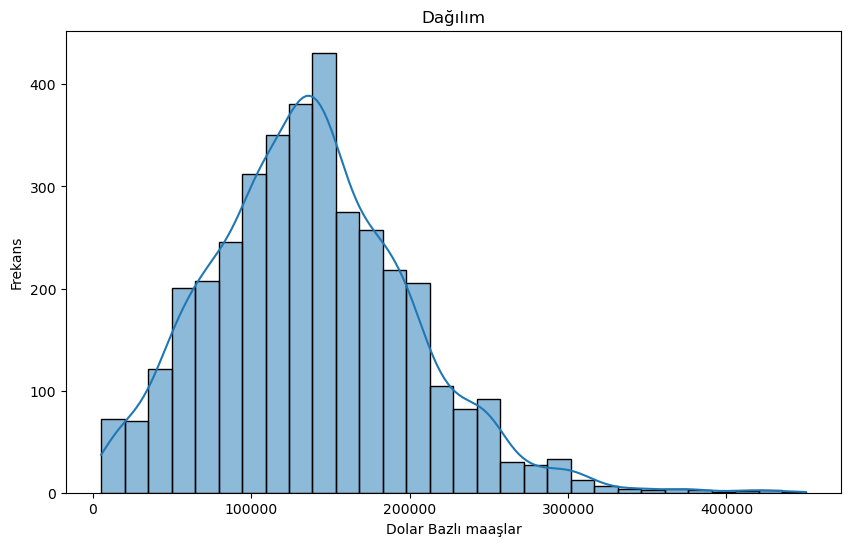

In [283]:
# şimdi de salary_in_usd değişkenini görselleştirelim
plt.figure(figsize=(10,6))
sns.histplot(data['salary_in_usd'], bins=30, kde=True)
plt.title('Dağılım')
plt.xlabel('Dolar Bazlı maaşlar')
plt.ylabel('Frekans')
plt.show() 

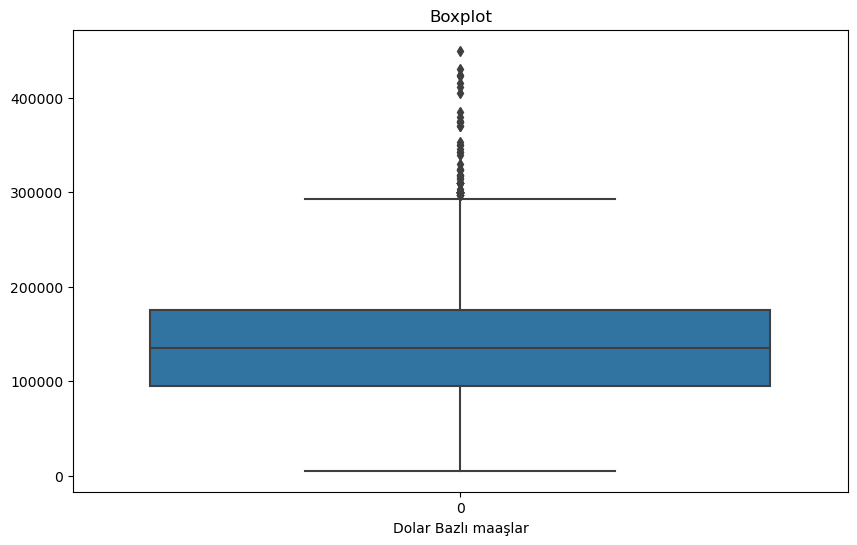

In [284]:
# şimdi de salary_in_usd değişkenini boxplot ile görselleştirelim
plt.figure(figsize=(10,6))
sns.boxplot(data['salary_in_usd'])
plt.title('Boxplot')
plt.xlabel('Dolar Bazlı maaşlar')
plt.show()

In [285]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [286]:
# şimdi de deneyim seviyesine ( experience_level ) göre inceleyelim 
data['experience_level'].value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [287]:
# burada map fonksiyonunu kullanarak experience_level değişkenini sayısal değerlere dönüştürelim
data['experience_level'] = data['experience_level'].map({'SE':2, 'MI':1, 'EN':0, 'EX':3})

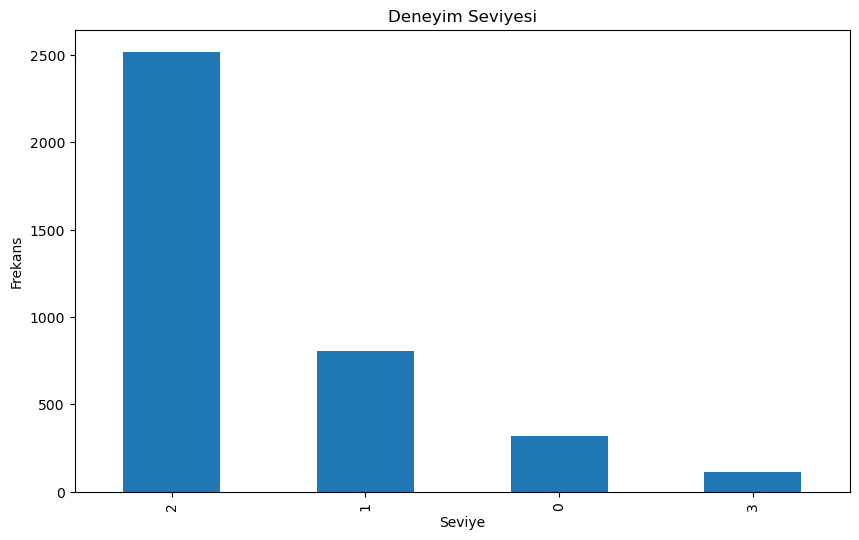

In [288]:
# şimdi de experience_level değişkenini görselleştirelim
plt.figure(figsize=(10,6))
data["experience_level"].value_counts().plot(kind='bar')
plt.title('Deneyim Seviyesi')
plt.xlabel('Seviye')
plt.ylabel('Frekans')
plt.show()

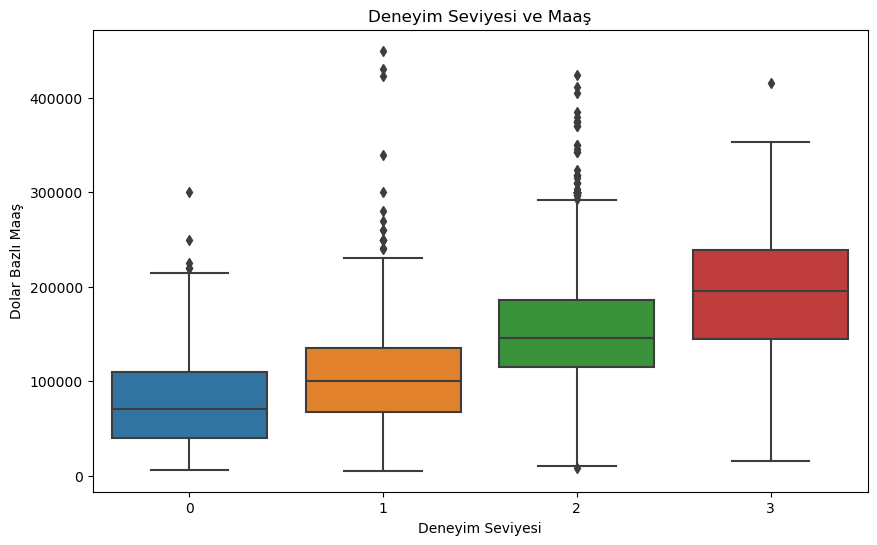

In [289]:
# şimdi de experience_level değişkenini salary_in_usd değişkenine göre görselleştirelim
plt.figure(figsize=(10,6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Deneyim Seviyesi ve Maaş')
plt.xlabel('Deneyim Seviyesi')
plt.ylabel('Dolar Bazlı Maaş')
plt.show()

In [290]:
# deneyimin maaşa bir etkisi var mı istatistiksel olarak inceleyelim
from scipy.stats import f_oneway

en = data[data['experience_level'] == 0]['salary_in_usd']
mi = data[data['experience_level'] == 1]['salary_in_usd']
se = data[data['experience_level'] == 2]['salary_in_usd']
ex = data[data['experience_level'] == 3]['salary_in_usd']

test = f_oneway(en, mi, se, ex)

print("Sonuçlar: ")
print("F Değeri: ", test[0])
print("P Değeri: ", test[1])

if test[1] < 0.05:
    print("Deneyim seviyesi maaşa etkili bir değişken")
    relational.append('experience_level')
else:
    print("Deneyim seviyesi maaşa etkili bir değişken değil")


Sonuçlar: 
F Değeri:  310.84425170411873
P Değeri:  3.0989451417587622e-180
Deneyim seviyesi maaşa etkili bir değişken


In [291]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,2,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,1,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,1,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,2,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,2,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [292]:
data["employment_type"].value_counts()

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

In [293]:
# burada employment_type değişkenini sayısal değerlere dönüştürelim
data['employment_type'] = data['employment_type'].map({"PT":0, "FL":1, "CT":2, "FT":3})

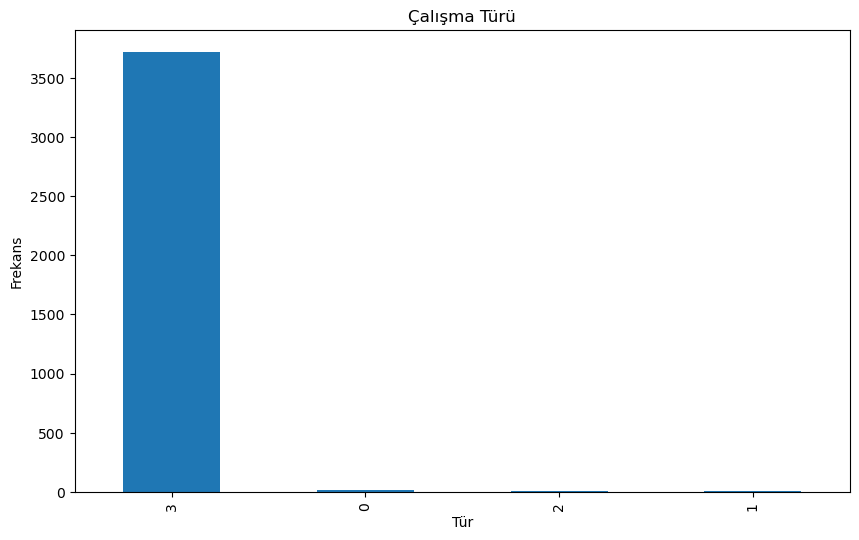

In [294]:
# şimdi de employment_type değişkenini görselleştirelimq
plt.figure(figsize=(10,6))
data["employment_type"].value_counts().plot(kind='bar')
plt.title('Çalışma Türü')
plt.xlabel('Tür')
plt.ylabel('Frekans')
plt.show()

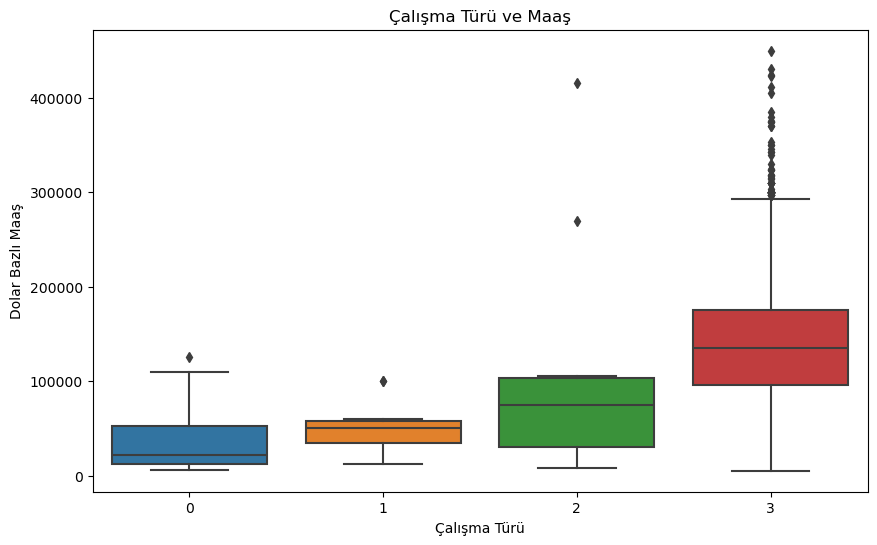

In [295]:
# şimdi de employment_type değişkenini salary_in_usd değişkenine göre görselleştirelim
plt.figure(figsize=(10,6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=data)
plt.title('Çalışma Türü ve Maaş')
plt.xlabel('Çalışma Türü')
plt.ylabel('Dolar Bazlı Maaş')
plt.show()

In [296]:
# çalışma türünün maaşa bir etkisi var mı istatistiksel olarak inceleyelim
pt = data[data['employment_type'] == 0]['salary_in_usd']
fl = data[data['employment_type'] == 1]['salary_in_usd']
ct = data[data['employment_type'] == 2]['salary_in_usd']
ft = data[data['employment_type'] == 3]['salary_in_usd']

test = f_oneway(pt, fl, ct, ft)

print("Sonuçlar: ")
print("F Değeri: ", test[0])
print("P Değeri: ", test[1])

if test[1] < 0.05:
    print("Çalışma türü maaşa etkili bir değişken")
    relational.append('employment_type')
else:
    print("Çalışma türü maaşa etkili bir değişken değil")

Sonuçlar: 
F Değeri:  20.850249944174557
P Değeri:  2.1508841037279137e-13
Çalışma türü maaşa etkili bir değişken


In [297]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,2,3,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,1,2,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,1,2,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,2,3,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,2,3,Data Scientist,120000,USD,120000,CA,100,CA,M


In [298]:
# burada job_title değişkenini inceleyelim
data["job_title"].value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

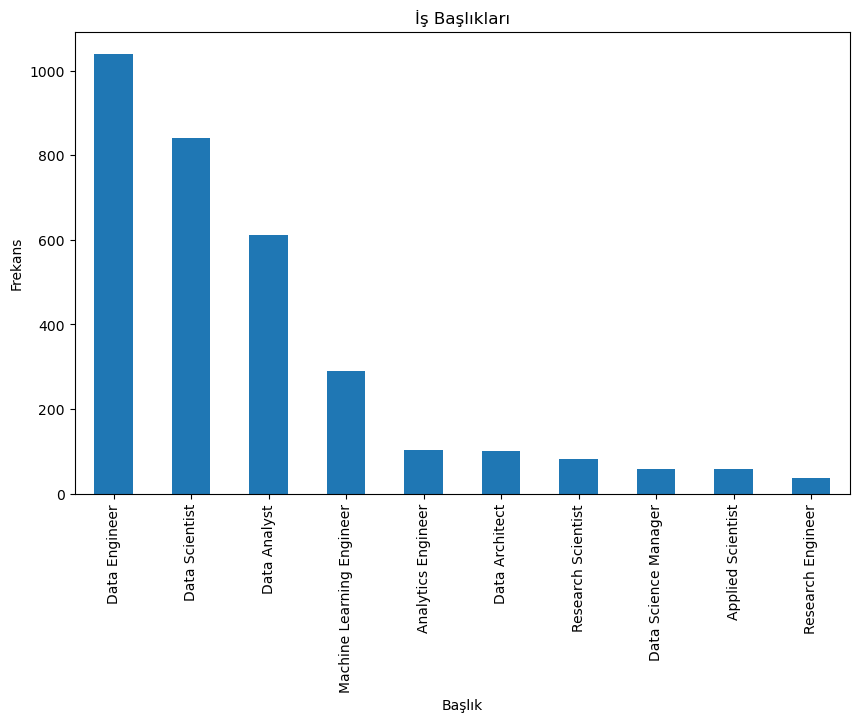

In [299]:
# şimdi de job_title değişkenini ilk en fazla on değerini görselleştirelim
plt.figure(figsize=(10,6))
data["job_title"].value_counts().head(10).plot(kind='bar')
plt.title('İş Başlıkları')
plt.xlabel('Başlık')
plt.ylabel('Frekans')
plt.show()

In [300]:
jobstitle = data["job_title"].value_counts().head(10).index

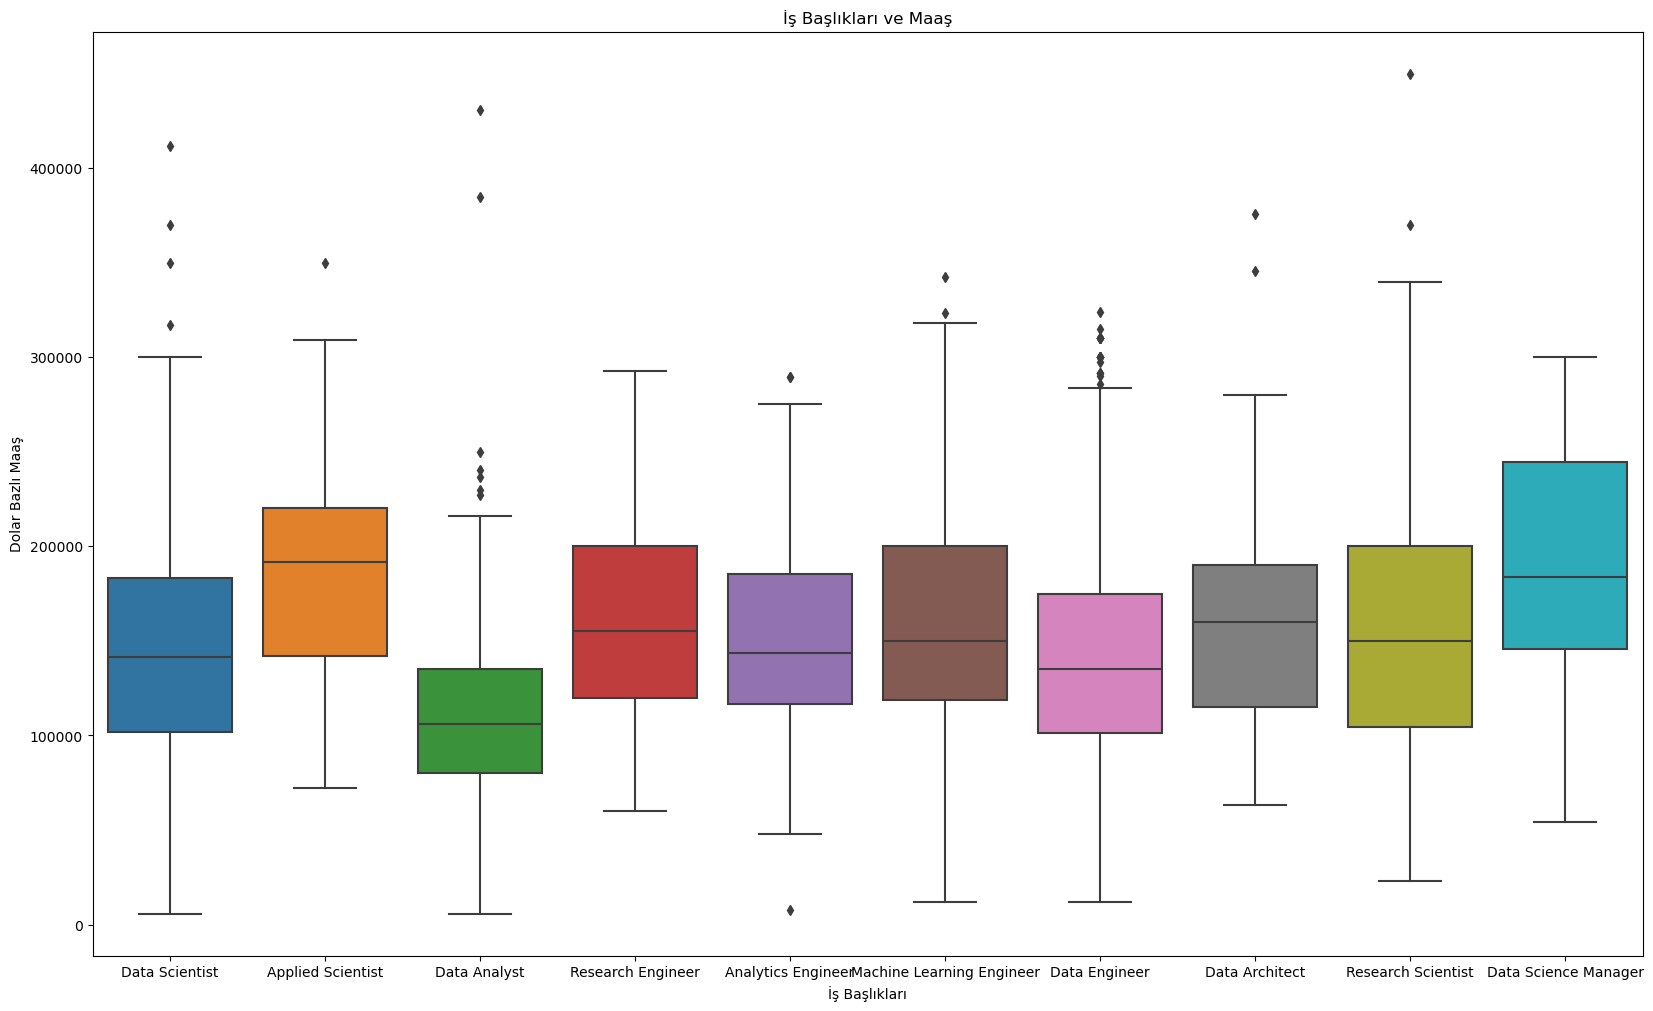

In [301]:
# şimdi de job_title(en fazla on değer) değişkenini salary_in_usd değişkenine göre görselleştirelim
plt.figure(figsize=(20,12))
sns.boxplot(x='job_title', y='salary_in_usd', data=data[data['job_title'].isin(jobstitle)])
plt.title('İş Başlıkları ve Maaş')
plt.xlabel('İş Başlıkları')
plt.ylabel('Dolar Bazlı Maaş')
plt.show()

In [302]:
jobstitle = data["job_title"].value_counts().head(10).index

In [303]:
data["employee_residence"].value_counts()

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64

In [304]:
# şimdi de employee_residence değişkenini inceleyelim
data['employee_residence'].value_counts().head(10)

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
DE      48
FR      38
PT      18
BR      18
GR      16
Name: count, dtype: int64

In [305]:
employeeresidence = data['employee_residence'].value_counts().head(10).index

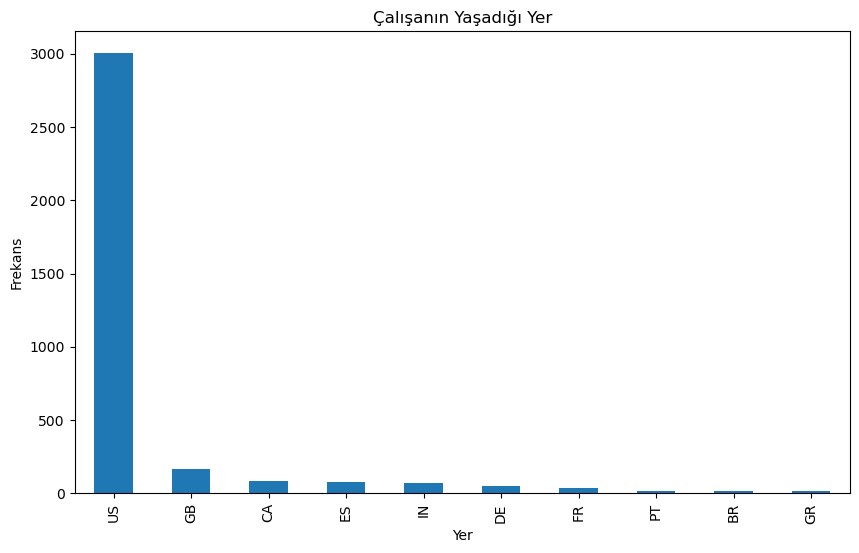

In [306]:
# şimdi de employee_residence değişkenini görselleştirelim
plt.figure(figsize=(10,6))
data['employee_residence'].value_counts().head(10).plot(kind='bar')
plt.title('Çalışanın Yaşadığı Yer')
plt.xlabel('Yer')
plt.ylabel('Frekans')
plt.show()


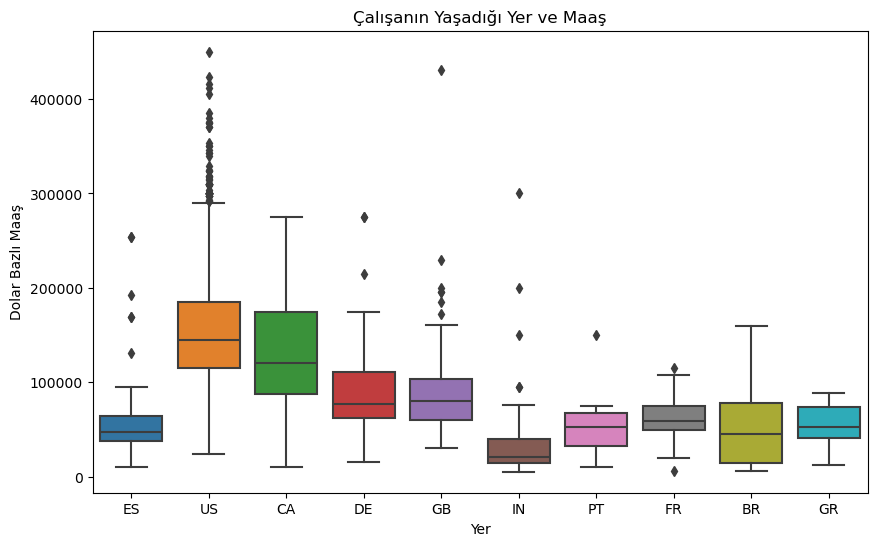

In [307]:
# şimdi de employee_residence değişkenini salary_in_usd değişkenine göre görselleştirelim
plt.figure(figsize=(10,6))
sns.boxplot(x='employee_residence', y='salary_in_usd', data=data[data['employee_residence'].isin(employeeresidence)])
plt.title('Çalışanın Yaşadığı Yer ve Maaş')
plt.xlabel('Yer')
plt.ylabel('Dolar Bazlı Maaş')
plt.show()

In [308]:
# şimdi de remote değişkenini inceleyelim
data['remote_ratio'].value_counts()

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64

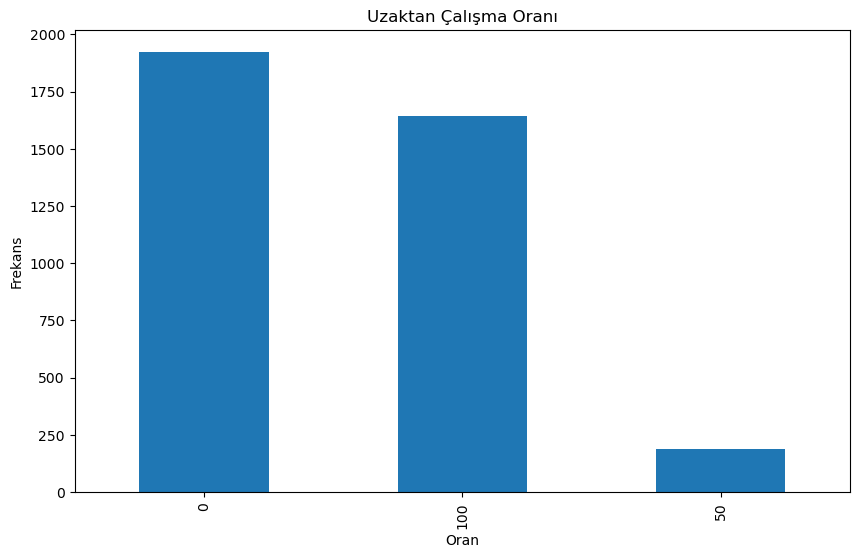

In [309]:
# şimdi de remote değişkenini görselleştirelim
plt.figure(figsize=(10,6))
data['remote_ratio'].value_counts().plot(kind='bar')
plt.title('Uzaktan Çalışma Oranı')
plt.xlabel('Oran')
plt.ylabel('Frekans')
plt.show()

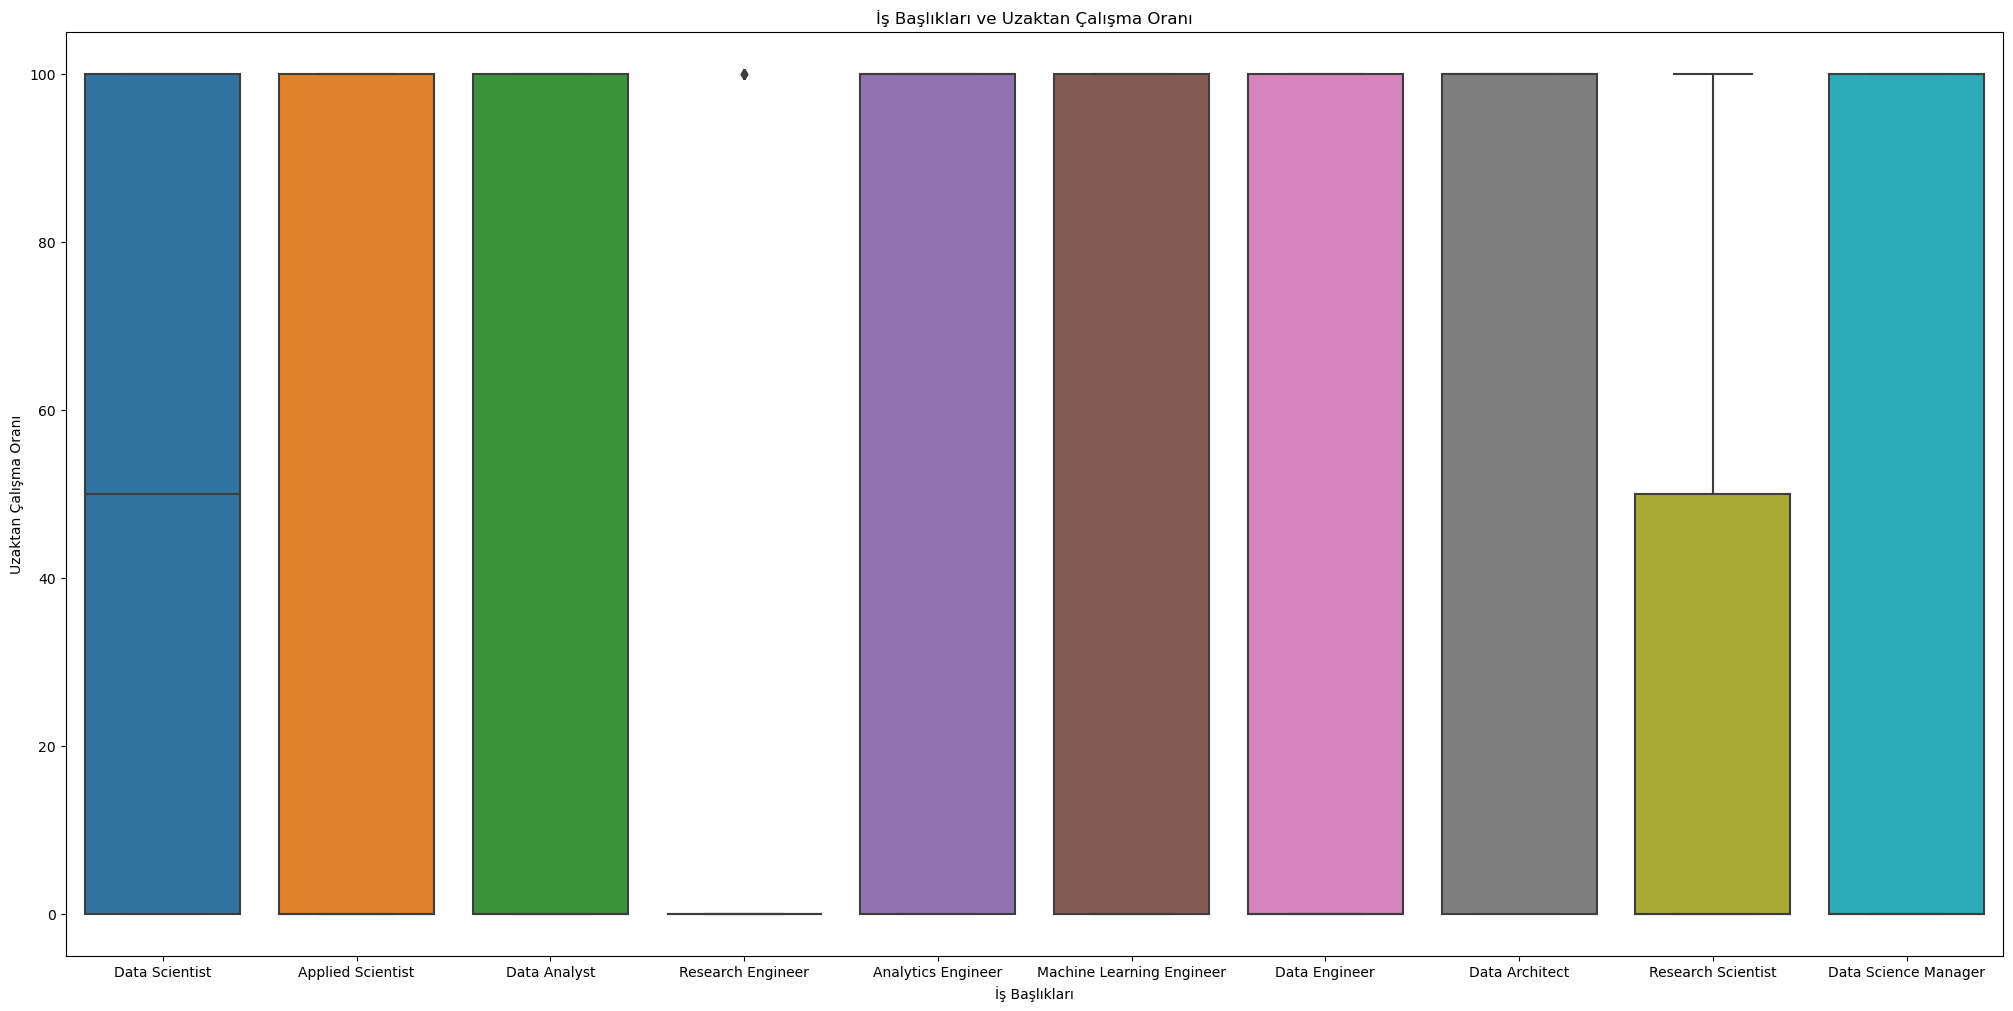

In [310]:
# şimdi de job_title'ye göre remote_ratio değişkenini görselleştirelim
plt.figure(figsize=(25,12))
sns.boxplot(x='job_title', y='remote_ratio', data=data[data['job_title'].isin(jobstitle)])
plt.title('İş Başlıkları ve Uzaktan Çalışma Oranı')
plt.xlabel('İş Başlıkları')
plt.ylabel('Uzaktan Çalışma Oranı')
plt.show()

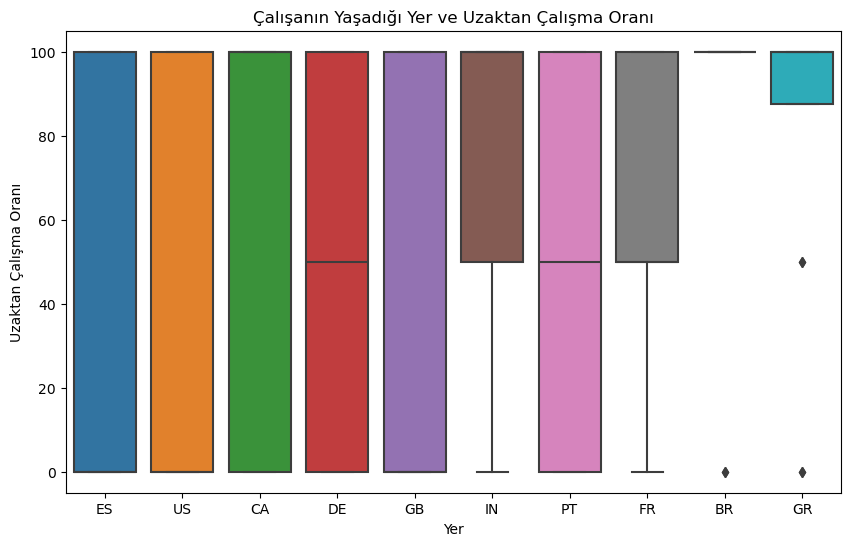

In [311]:
# hangi ülkeler ne kadar remote çalışıyor bakalım
plt.figure(figsize=(10,6))
sns.boxplot(x='employee_residence', y='remote_ratio', data=data[data['employee_residence'].isin(employeeresidence)])
plt.title('Çalışanın Yaşadığı Yer ve Uzaktan Çalışma Oranı')
plt.xlabel('Yer')
plt.ylabel('Uzaktan Çalışma Oranı')
plt.show()

In [312]:
# şimdi de şirket büyüklüğüne bakalım
data['company_size'].value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

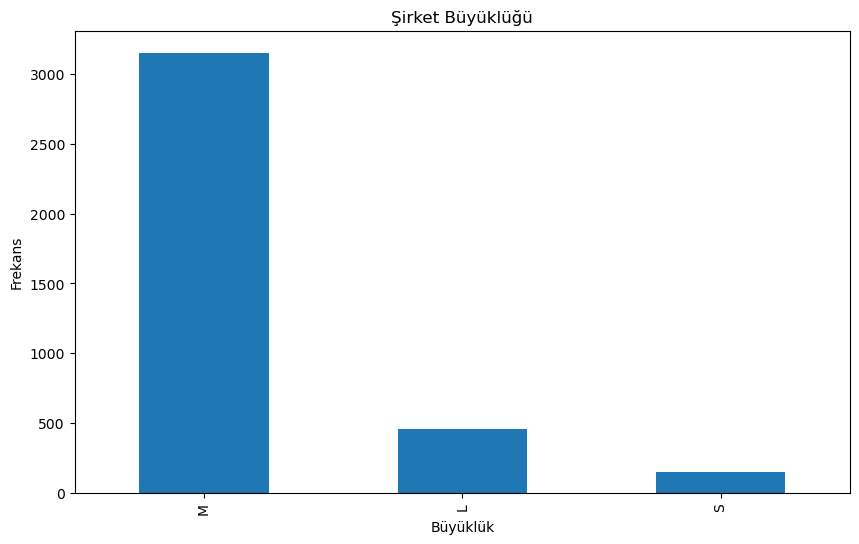

In [313]:
# şimdi de company_size değişkenini görselleştirelim
plt.figure(figsize=(10,6))
data['company_size'].value_counts().plot(kind='bar')
plt.title('Şirket Büyüklüğü')
plt.xlabel('Büyüklük')
plt.ylabel('Frekans')
plt.show()

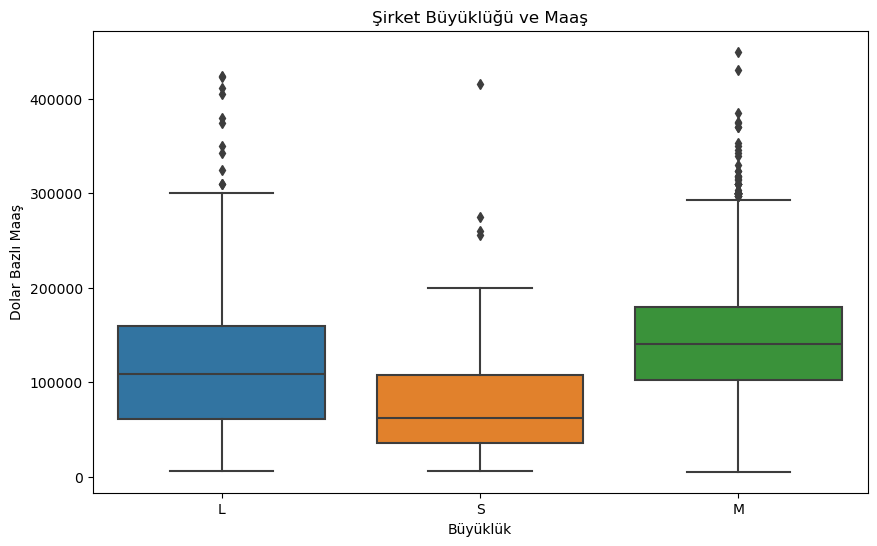

In [314]:
# şimdi de company_size değişkenini salary_in_usd değişkenine göre görselleştirelim
plt.figure(figsize=(10,6))
sns.boxplot(x='company_size', y='salary_in_usd', data=data)
plt.title('Şirket Büyüklüğü ve Maaş')
plt.xlabel('Büyüklük')
plt.ylabel('Dolar Bazlı Maaş')
plt.show()

In [316]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,2,3,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,1,2,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,1,2,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,2,3,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,2,3,Data Scientist,120000,USD,120000,CA,100,CA,M
